<a href="https://colab.research.google.com/github/cinsigna/lab-image-classification-using-convolutional-neural-networks/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)


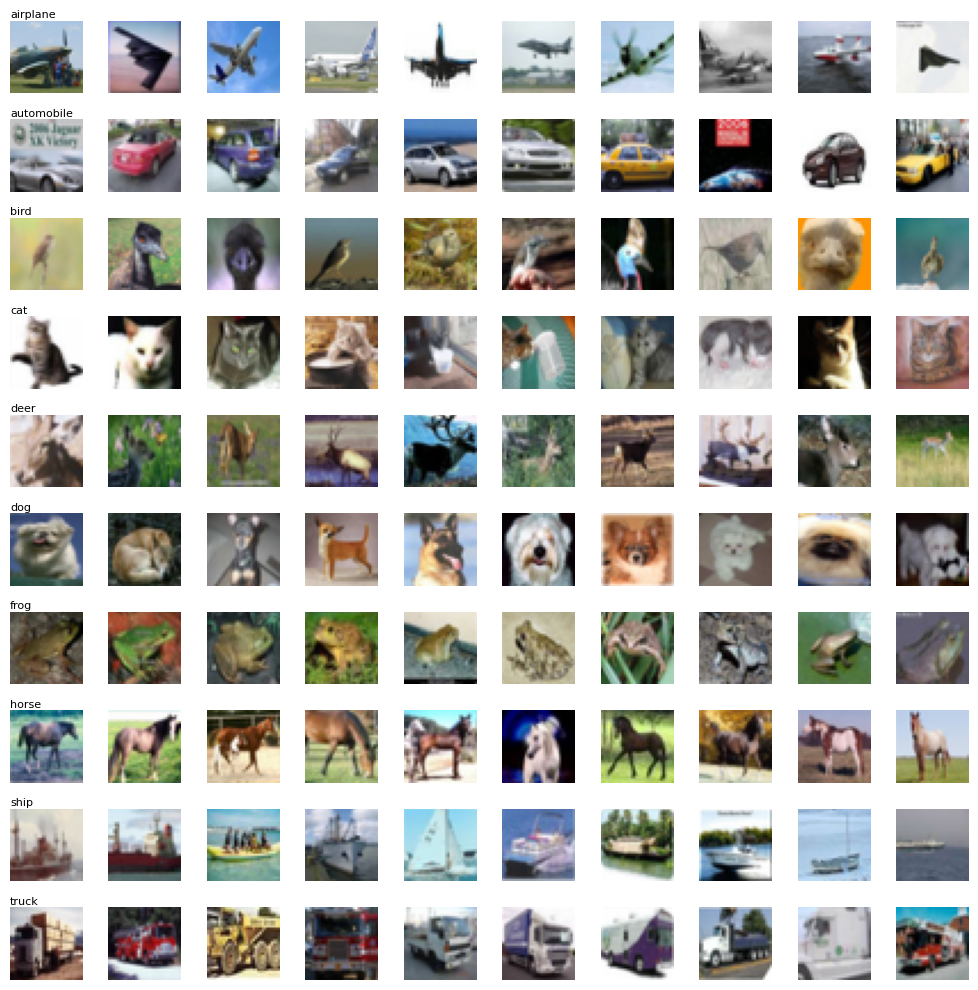

In [2]:
# Your code here :

print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)
print(x_test.shape)



# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# convert class vectors to binary class matrices
num_classes = 10
y_train_oh = to_categorical(y_train, num_classes)
y_test_oh  = to_categorical(y_test,  num_classes)


#Visualize: 10×10 grid, 10 random samples per class
class_names = ["airplane","automobile","bird","cat","deer",
               "dog","frog","horse","ship","truck"]

y_train_f = y_train.flatten()
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for cls in range(10):
    idxs = np.where(y_train_f == cls)[0]
    sel = np.random.choice(idxs, 10, replace=False)
    for j, idx in enumerate(sel):
        ax = axes[cls, j]
        ax.imshow(x_train[idx])
        ax.axis("off")
        if j == 0:
            ax.set_title(class_names[cls], fontsize=8, loc='left', pad=2)

plt.tight_layout()
plt.show()







## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
# Your code here :
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Dropout

# Build the model

input_shape = (32, 32, 3)
model = Sequential([
    InputLayer(shape=input_shape),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax"),
])


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [5]:
# Your code here :
batch_size = 512
epochs = 50


model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_oh, batch_size=batch_size, epochs=epochs, validation_split=0.1)




Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.1310 - loss: 2.2938 - val_accuracy: 0.2334 - val_loss: 2.2014
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2028 - loss: 2.1918 - val_accuracy: 0.2712 - val_loss: 2.1084
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2342 - loss: 2.1180 - val_accuracy: 0.3028 - val_loss: 2.0372
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2564 - loss: 2.0600 - val_accuracy: 0.3238 - val_loss: 1.9822
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2831 - loss: 2.0152 - val_accuracy: 0.3354 - val_loss: 1.9420
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2897 - loss: 1.9830 - val_accuracy: 0.3470 - val_loss: 1.9145
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3009 - loss: 1.9630 - val_accuracy: 0.3542 - val_loss: 1.8923
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3137 - loss: 1.9335 - val_accuracy: 0.3604 - v

*   Plot the cross entropy loss curve and the accuracy curve

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


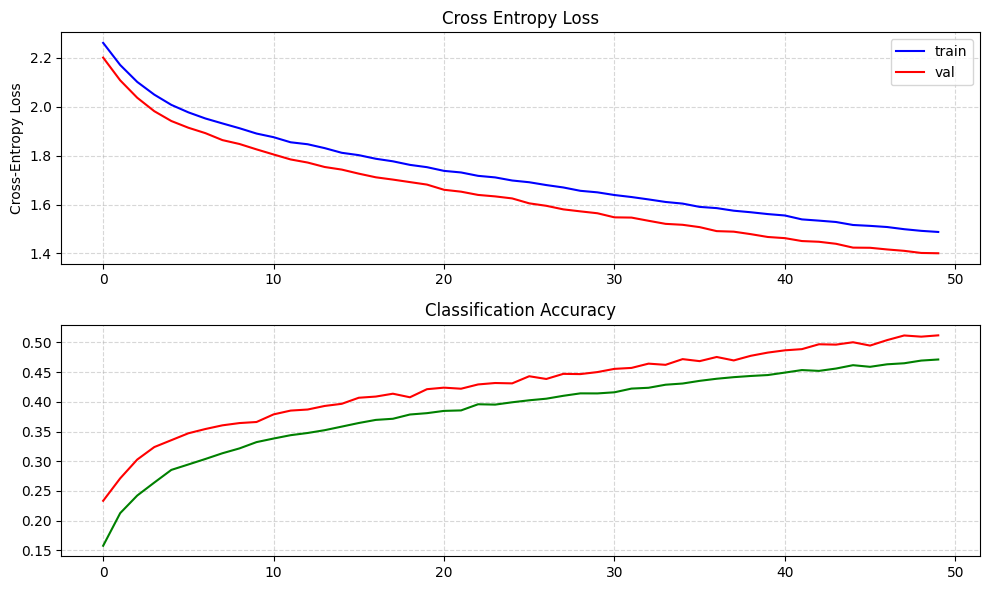

In [6]:
# Your code here :
print(history.history.keys())

plt.figure(figsize=(10, 6))

plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# plot accuracy
plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()







## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [7]:
from keras.backend import clear_session
clear_session()

In [8]:
# Your code here :

from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Dropout

# Build the model

input_shape = (32, 32, 3)
model = Sequential([
    InputLayer(shape=input_shape),
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax"),
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [9]:
# Your code here :
batch_size = 512
epochs = 50


model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(x_train, y_train_oh, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.1168 - loss: 2.2967 - val_accuracy: 0.2176 - val_loss: 2.2589
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1739 - loss: 2.2466 - val_accuracy: 0.2716 - val_loss: 2.1566
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2275 - loss: 2.1442 - val_accuracy: 0.2962 - val_loss: 2.0343
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2558 - loss: 2.0618 - val_accuracy: 0.3178 - val_loss: 1.9662
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2748 - loss: 2.0091 - val_accuracy: 0.3302 - val_loss: 1.9147
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2981 - loss: 1.9600 - val_accuracy: 0.3484 - val_loss: 1.8853
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3082 - loss: 1.9273 - val_accuracy: 0.3522 - val_loss: 1.8478
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3239 - loss: 1.8974 - val_accuracy: 0.3594 - 

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


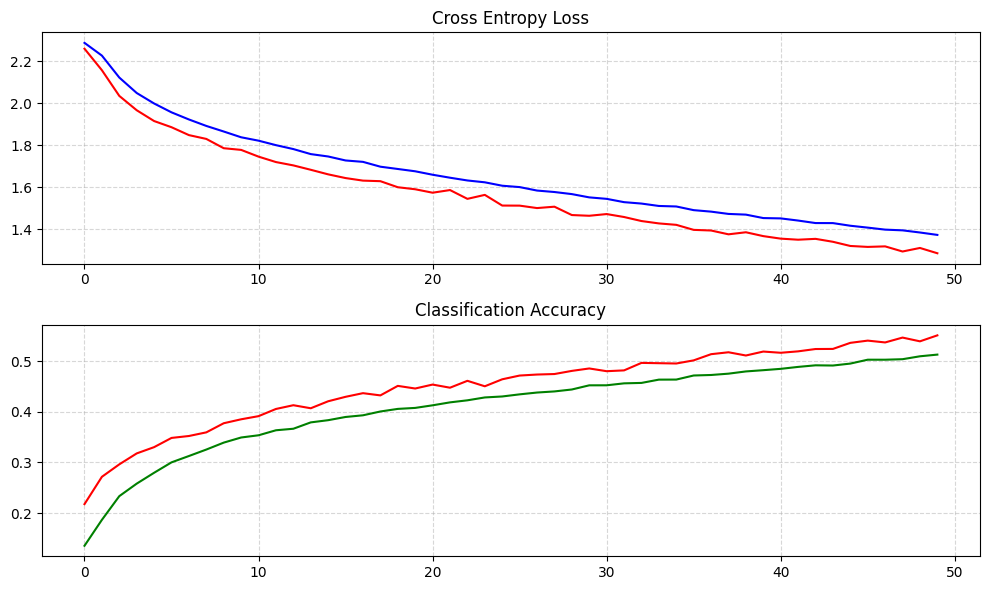

In [10]:
# Your code here :
print(history2.history.keys())

plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history2.history['loss'], color='blue', label='train')
plt.plot(history2.history['val_loss'], color='red', label='val')
plt.grid(True, linestyle='--', alpha=0.5)

# plot accuracy
plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history2.history['accuracy'], color='green', label='train')
plt.plot(history2.history['val_accuracy'], color='red', label='val')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Comment on the observation**

* The model accuracy improved, the loss remained around the same.

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


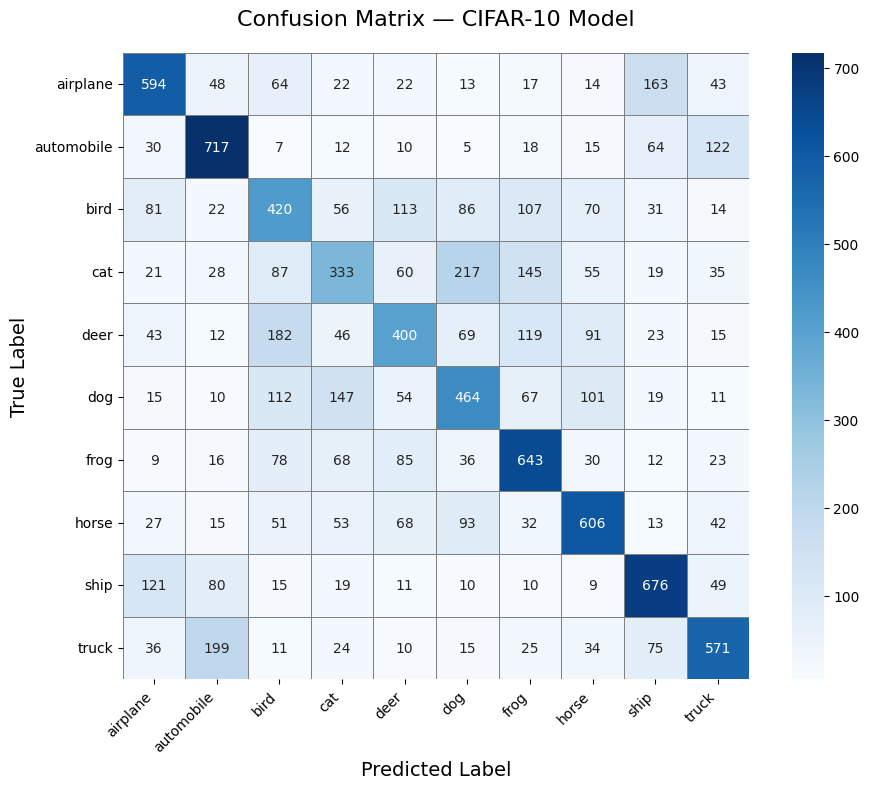

In [11]:
# Your code here :


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
gt = np.argmax(y_test_oh, axis=1)

# Compute confusion matrix
cm = confusion_matrix(gt, predictions)

# CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck']

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
      xticklabels=class_names,
      yticklabels=class_names,
      cbar=True, square=True,
      linewidths=0.5, linecolor='gray')
plt.title('Confusion Matrix — CIFAR-10 Model', fontsize=16, pad=20)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Comment here :**

*(The model is quite good to classify ships, airplanes, trucks, and automobiles, but struggles a bit berween frogs ,cats and dogs.

...

*    Print the test accuracy for the trained model.

In [12]:
# Your code here :

test_loss, test_acc = model.evaluate(x_test, y_test_oh)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5438 - loss: 1.2825
Test loss: 1.286841869354248
Test accuracy: 0.5424000024795532


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [13]:
from keras.backend import clear_session
clear_session()

In [14]:
# Your code here :

import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Dropout, BatchNormalization, GlobalAveragePooling2D

# Build the model

x_train64 = tf.image.resize(x_train, [64, 64]).numpy().astype("float32") / 255.0
x_test64  = tf.image.resize(x_test,  [64, 64]).numpy().astype("float32") / 255.0

num_classes = 10
y_train_oh = to_categorical(y_train, num_classes)
y_test_oh  = to_categorical(y_test,  num_classes)



input_shape2 = (64, 64, 3)
model2 = Sequential([
    InputLayer(shape=input_shape2),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(num_classes, activation="softmax"),
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [15]:
# Your code here :

from sklearn.metrics import confusion_matrix
batch_size = 512
epochs = 10

from tensorflow.keras.optimizers import Adam

model2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train64, y_train_oh, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.3213 - loss: 1.8977 - val_accuracy: 0.0986 - val_loss: 4.5684
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 431ms/step - accuracy: 0.5333 - loss: 1.2778 - val_accuracy: 0.0986 - val_loss: 5.3845
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 431ms/step - accuracy: 0.6495 - loss: 0.9883 - val_accuracy: 0.1064 - val_loss: 6.1615
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 431ms/step - accuracy: 0.7167 - loss: 0.8038 - val_accuracy: 0.0986 - val_loss: 4.0127
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 431ms/step - accuracy: 0.7711 - loss: 0.6625 - val_accuracy: 0.0986 - val_loss: 3.3599
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 430ms/step - accuracy: 0.8111 - loss: 0.5496 - val_accuracy: 0.1796 - val_loss: 2.6871
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 430ms/step - accuracy: 0.8419 - loss: 0.4585 - val_accuracy: 0.3298 - val_loss: 2.5262
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 429ms/step - accuracy: 0.8743 - loss: 0.3697 - val_accura

Test loss: 1.3785994052886963
Test accuracy: 0.5741999745368958
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


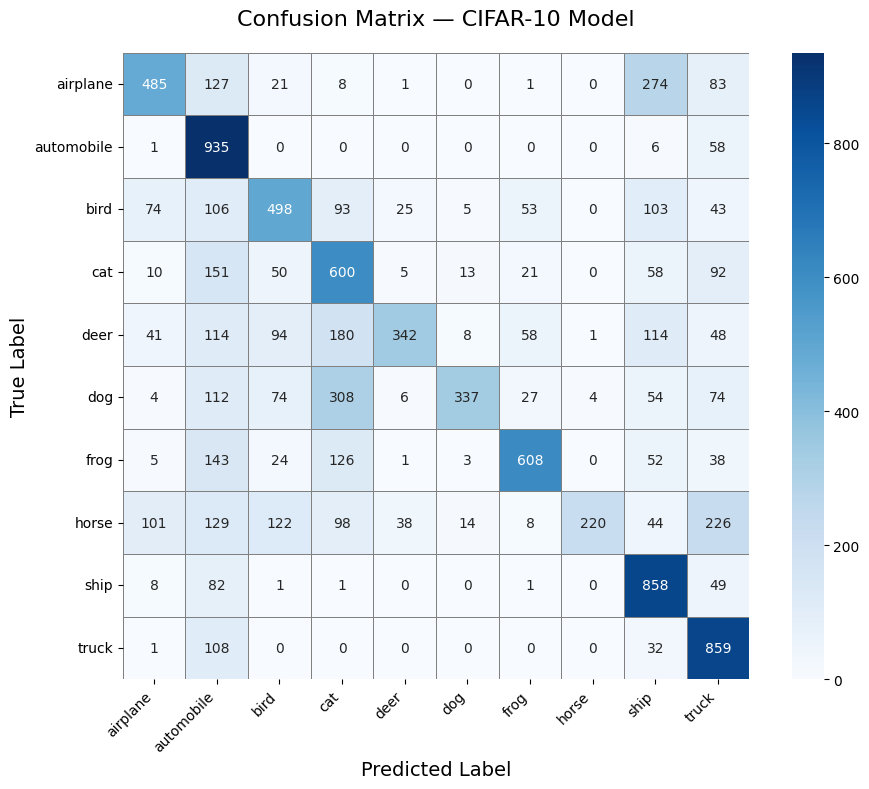

In [16]:
import seaborn as sns



score_test = model2.evaluate(x_test64, y_test_oh, verbose=0)
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[1])

# Predictions
predictions2 = model2.predict(x_test64)
predictions2 = np.argmax(predictions2, axis=1)
gt2 = np.argmax(y_test_oh, axis=1)

# Compute confusion matrix
cm2 = confusion_matrix(gt2, predictions2)

# CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck']

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
      xticklabels=class_names,
      yticklabels=class_names,
      cbar=True, square=True,
      linewidths=0.5, linecolor='gray')
plt.title('Confusion Matrix — CIFAR-10 Model', fontsize=16, pad=20)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

They add non-linearity to the model so it can learn complex patterns instead of just straight-line relationships. Without them, the network would behave like a linear model.

_

2 - Key Differences between sigmoid and softmax:
Sigmoid is used for binary classification and gives one output between 0 and 1.
Softmax is for multi-class problems and gives probabilities for all classes that add up to 1.



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
Binary crossentropy is used for two-class problems (with sigmoid), while categorical crossentropy is used for multi-class problems (with softmax).

_
